In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine.xls",names = 
              ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [3]:
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# DATA preprocessing

In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isna().sum()

Cultivator              0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_phenols           0
Falvanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.corr()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [8]:
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [9]:
a=df[df['Cultivator']==1]
b=df[df['Cultivator']==2]
c=df[df['Cultivator']==3]

Here Cultivator is the Target variable.
Hence we see the correlation values wrt it and take one by one from the least to highest

In [10]:
from scipy.stats import f_oneway
f_oneway(a['Ash'],b['Ash'],c['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

# Thus pvalue<0.05,we reject Null hypothesis and say the categories are significantly different.

In [11]:
tar_val=np.abs(df.corr()['Cultivator'])
tar_val.sort_values(ascending=True)

Ash                     0.049643
Magnesium               0.209179
Color_intensity         0.265668
Alcohol                 0.328222
Malic_Acid              0.437776
Nonflavanoid_phenols    0.489109
Proanthocyanins         0.499130
Alcalinity_of_Ash       0.517859
Hue                     0.617369
Proline                 0.633717
Total_phenols           0.719163
OD280                   0.788230
Falvanoids              0.847498
Cultivator              1.000000
Name: Cultivator, dtype: float64

In [12]:
for i in df.columns:
    print(i," ",f_oneway(a[i],b[i],c[i]))
    

Cultivator   F_onewayResult(statistic=3.273209053699452e+17, pvalue=0.0)
Alcohol   F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)
Malic_Acid   F_onewayResult(statistic=36.94342496318366, pvalue=4.127228798041834e-14)
Ash   F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)
Alcalinity_of_Ash   F_onewayResult(statistic=35.77163740730924, pvalue=9.444472938826817e-14)
Magnesium   F_onewayResult(statistic=12.4295843381499, pvalue=8.963395439251042e-06)
Total_phenols   F_onewayResult(statistic=93.73300962036718, pvalue=2.1376700154385954e-28)
Falvanoids   F_onewayResult(statistic=233.92587268154935, pvalue=3.5985858307136404e-50)
Nonflavanoid_phenols   F_onewayResult(statistic=27.575417146965872, pvalue=3.88804090047893e-11)
Proanthocyanins   F_onewayResult(statistic=30.27138317022762, pvalue=5.125358737546706e-12)
Color_intensity   F_onewayResult(statistic=120.66401844100312, pvalue=1.162008021927618e-33)
Hue   F_onewayResult(statistic=10

# MAchine Learning Modeliing

In [13]:
x=df.drop(['Cultivator'],1)
y=df['Cultivator']

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

# Logistic Regression

In [17]:
lr=LogisticRegression()
lr.fit(xtrain_sc,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print("Accuracy of train:",lr.score(xtrain_sc,ytrain))
print("Accuracy of test:",lr.score(xtest_sc,ytest))

Accuracy of train: 0.9919354838709677
Accuracy of test: 1.0


In [19]:
lr=LogisticRegression()
kf=KFold(n_splits=10,shuffle=True,random_state=0)
score1=cross_val_score(lr,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')

In [20]:
print(np.mean(score1))
print(np.std(score1,ddof=1))



0.9678164428164429
0.041627221384037114


Guassian Naves Bayes

In [21]:
nb=GaussianNB()
kf=KFold(n_splits=10,shuffle=True,random_state=0)
score2=cross_val_score(nb,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
print(np.mean(score2))
print(np.std(score2,ddof=1))


0.9760822510822511
0.038542262190570935


# KNN

In [22]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
kf=KFold(n_splits=10,shuffle=True,random_state=0)
GS=GridSearchCV(knn,param_grid=params,cv=kf,scoring='f1_weighted')
GS.fit(xtrain_sc,ytrain)


C:\Users\Neha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20,...26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['unifo

In [23]:
GS.best_params_

{'n_neighbors': 85, 'weights': 'distance'}

In [24]:
knn=KNeighborsClassifier(n_neighbors=85,weights='distance')

In [25]:
kf=KFold(n_splits=5,random_state=0,shuffle=True)
score3=cross_val_score(knn,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')

In [26]:
print(np.mean(score3))
print(np.std(score3,ddof=1))

0.9532295906991559
0.06290441448840348


In [27]:
print("Score in Logistic Regresssion Model=",score1*100)
print("Score in Gaussian NB  Model=",score2*100)
print("Score in KNN Model=",score3*100)

Score in Logistic Regresssion Model= [ 92.30769231 100.         100.          92.30769231 100.
  91.80911681 100.         100.         100.          91.39194139]
Score in Gaussian NB  Model= [ 92.30769231 100.         100.          92.10789211 100.
 100.          91.66666667 100.         100.         100.        ]
Score in KNN Model= [ 95.96190476 100.         100.          95.99171843  84.66117216]


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
from sklearn import metrics
from IPython.display import Image  
from sklearn import tree
from os import system


In [29]:
dt.fit(xtrain_sc,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [30]:
y_train_pred=dt.predict(xtrain_sc)
y_test_pred=dt.predict(xtest_sc)

In [31]:
acc_train=metrics.accuracy_score(ytrain,y_train_pred)
acc_test=metrics.accuracy_score(ytest,y_test_pred)

In [32]:
print("Accuracy of Train in Decision Tree Full model",acc_train*100)
print("Accuracy of Test in Decision Tree Full model",acc_test*100)

Accuracy of Train in Decision Tree Full model 100.0
Accuracy of Test in Decision Tree Full model 94.44444444444444


In [33]:
cm=metrics.confusion_matrix(ytest,y_test_pred)
print(cm)

[[17  2  0]
 [ 0 21  1]
 [ 0  0 13]]


In [35]:
#Diabetic_Tree_File = open('diabetes_tree.dot','w')
#dot_data = tree.export_graphviz(dt, out_file=Diabetic_Tree_File, 
 #       feature_names = list(xtrain_sc), class_names = list(ytrain))
#Diabetic_Tree_File.close()

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(diabetes_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
Diabetic_Tree_File = open('diabetes_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Diabetic_Tree_File, 
        feature_names = list(x_train), class_names = list(y_train))

Diabetic_Tree_File.close()


In [36]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':np.arange(1,10),'criterion':['entropy','gini']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(dt,param_grid=param,cv=kf,scoring='f1_weighted')
GS.fit(xtrain_sc,ytrain)

C:\Users\Neha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [37]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [38]:
dt_reg=DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=6)

In [39]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
cv=cross_val_score(dt_reg,x,y,cv=kf,scoring='f1_weighted')
dt_reg.fit(xtrain_sc,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
y_train_pred=dt_reg.predict(xtrain_sc)
y_test_pred=dt_reg.predict(xtest_sc)
acc_train=metrics.accuracy_score(ytrain,y_train_pred)
acc_test=metrics.accuracy_score(ytest,y_test_pred)
print("Accuracy of Train in Decision Tree Full model",acc_train*100)
print("Accuracy of Test in Decision Tree Full model",acc_test*100)

Accuracy of Train in Decision Tree Full model 100.0
Accuracy of Test in Decision Tree Full model 94.44444444444444


In [41]:
pd.DataFrame(dt_reg.feature_importances_,index=x.columns)

,0
Alcohol,0.000000
Malic_Acid,0.020361
Ash,0.023891
Alcalinity_of_Ash,0.000000
Magnesium,0.000000
Total_phenols,0.000000
Falvanoids,0.417538
Nonflavanoid_phenols,0.000000
Proanthocyanins,0.000000
Color_intensity,0.406217


#### Thus we get Alcohol,Alcalinity_of_Ash,Magnesium,Total_phenols,Nonflavanoid_phenols,Proanthocyanins,Hue & OD280 are having feature importance as 0.Hence these have not been used in the decision tree at all

In [42]:
from sklearn.ensemble import RandomForestClassifier
cfe=RandomForestClassifier(random_state=0)



In [43]:
rf_be=[]
rf_ve=[]
for n in np.arange(1,100):
    RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    fs=cross_val_score(cfe,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
    rf_be.append(np.mean(1-fs))
    rf_ve.append(np.std(fs,ddof=1))

In [44]:
print(np.min(rf_ve))
print(np.argmin(rf_ve))

0.027704306232262617
0


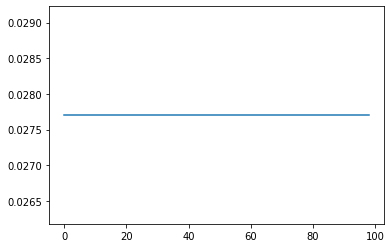

In [45]:
x_axis=np.arange(len(rf_ve))
plt.plot(x_axis,rf_ve)

In [46]:
rf_be[0]

0.08077333605506976

In [47]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier

In [48]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
fs=GridSearchCV(knn,cv=kf,param_grid=params,scoring='f1_weighted')
fs.fit(xtrain_sc,ytrain)

C:\Users\Neha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 2...26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['unif

In [49]:
fs.best_params_

{'n_neighbors': 32, 'weights': 'distance'}

In [50]:
knn=KNeighborsClassifier(n_neighbors= 32, weights= 'distance')
knn_be=[]
knn_ve=[]
for i in np.arange(1,100):
    knn_bag=BaggingClassifier(n_estimators=n,base_estimator=knn,random_state=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    f1=cross_val_score(knn_bag,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
    knn_be.append(np.mean(1-f1))
    knn_ve.append(np.std(f1,ddof=1))

In [51]:
np.min(knn_ve),np.argmin(knn_ve),knn_be[10]

(0.03433510639017195, 0, 0.0328827784699907)

# LR bagging

In [52]:
LR=LogisticRegression(random_state=0)
LR_bag_BE=[]
LR_bag_VE=[]
for n in np.arange(1,100):
    LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=n,random_state=0)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    f1=cross_val_score(LR_bag,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
    LR_bag_BE.append(np.mean(1-f1))
    LR_bag_VE.append(np.std(f1,ddof=1))

In [53]:
np.min(LR_bag_VE),np.argmin(LR_bag_VE)

(0.013594601489761065, 1)

# NB bagging

In [54]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
nb=GaussianNB()
nb_bag_be=[]
nb_bag_ve=[]
for i in np.arange(1,100):
    nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=n,random_state=0)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    f1=cross_val_score(nb_bag,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
    nb_bag_be.append(np.mean(1-f1))
    nb_bag_ve.append(np.std(f1,ddof=1))

In [55]:
np.min(nb_bag_ve),np.argmin(nb_bag_ve)

(0.00047469578226067016, 0)

# Adaboost Classifier

In [ ]:
ad=AdaBoostClassifier()
ad_ve=[]
ad_be=[]
for i in np.arange(1,100):
    ad_bag=BaggingClassifier(n_estimators=i,base_estimator=ad,random_state=0)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    f1=cross_val_score(ad_bag,xtrain_sc,ytrain,cv=kf,scoring='f1_weighted')
    ad_be.append(np.mean(1-f1))
    ad_ve.append(np.std(f1,ddof=1))

In [ ]:
np.min(ad_ve),np.argmin(ad_ve)